In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
# Path to the dataset
DATA_PATH = '../data/raw/data.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully!")
    
    # --- FIX: Standardize column names ---
    original_columns = df.columns.tolist()
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    cleaned_columns = df.columns.tolist()
    
    print("\nOriginal columns:", original_columns)
    print("Cleaned columns:", cleaned_columns)
    
except FileNotFoundError:
    print(f"Error: The file was not found at {DATA_PATH}")
    print("Please ensure you have downloaded the 'Steel Fatigue Strength Prediction' dataset and named it 'data.csv' in the 'data/raw' folder.")

Dataset loaded successfully!

Original columns: ['Sl. No.', 'NT', 'THT', 'THt', 'THQCr', 'CT', 'Ct', 'DT', 'Dt', 'QmT', 'TT', 'Tt', 'TCr', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu', 'Mo', 'RedRatio', 'dA', 'dB', 'dC', 'Fatigue']
Cleaned columns: ['sl._no.', 'nt', 'tht', 'tht', 'thqcr', 'ct', 'ct', 'dt', 'dt', 'qmt', 'tt', 'tt', 'tcr', 'c', 'si', 'mn', 'p', 's', 'ni', 'cr', 'cu', 'mo', 'redratio', 'da', 'db', 'dc', 'fatigue']


In [9]:
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
df.info()

print("\nStatistical Summary:")
display(df.describe())


First 5 rows of the dataset:


,sl._no.,nt,tht,tht,thqcr,ct,ct,dt,dt,qmt,...,s,ni,cr,cu,mo,redratio,da,db,dc,fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sl._no.   437 non-null    int64  
 1   nt        437 non-null    int64  
 2   tht       437 non-null    int64  
 3   tht       437 non-null    int64  
 4   thqcr     437 non-null    int64  
 5   ct        437 non-null    int64  
 6   ct        437 non-null    float64
 7   dt        437 non-null    float64
 8   dt        437 non-null    float64
 9   qmt       437 non-null    int64  
 10  tt        437 non-null    int64  
 11  tt        437 non-null    int64  
 12  tcr       437 non-null    float64
 13  c         437 non-null    float64
 14  si        437 non-null    float64
 15  mn        437 non-null    float64
 16  p         437 non-null    float64
 17  s         437 non-null    float64
 18  ni        437 non-null    float64
 19  cr        437 non-null    float64
 20  cu        

,sl._no.,nt,tht,tht,thqcr,ct,ct,dt,dt,qmt,...,s,ni,cr,cu,mo,redratio,da,db,dc,fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,126.295289,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,1.000000,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,110.000000,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,219.000000,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,328.000000,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,437.000000,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


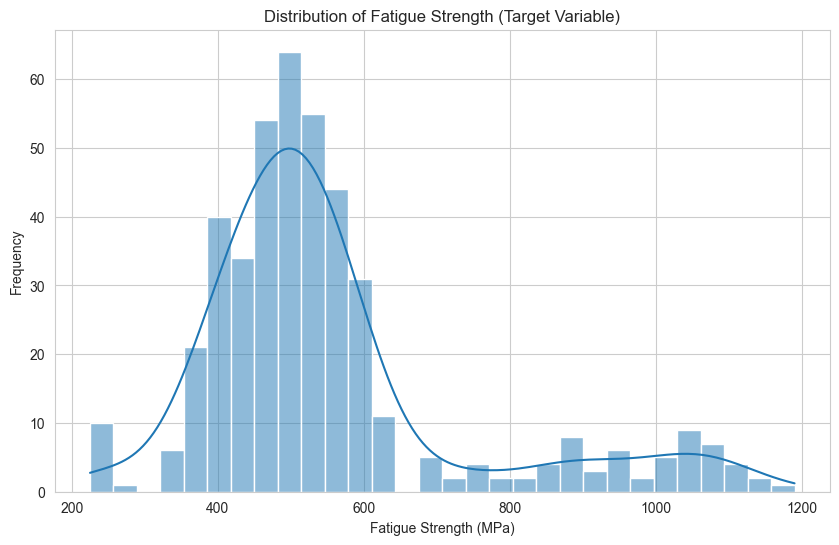

In [11]:

# Use the new, standardized column name 'fatigue_strength'
TARGET_COL = 'fatigue'

plt.figure(figsize=(10, 6))
sns.histplot(df[TARGET_COL], kde=True, bins=30)
plt.title('Distribution of Fatigue Strength (Target Variable)')
plt.xlabel('Fatigue Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

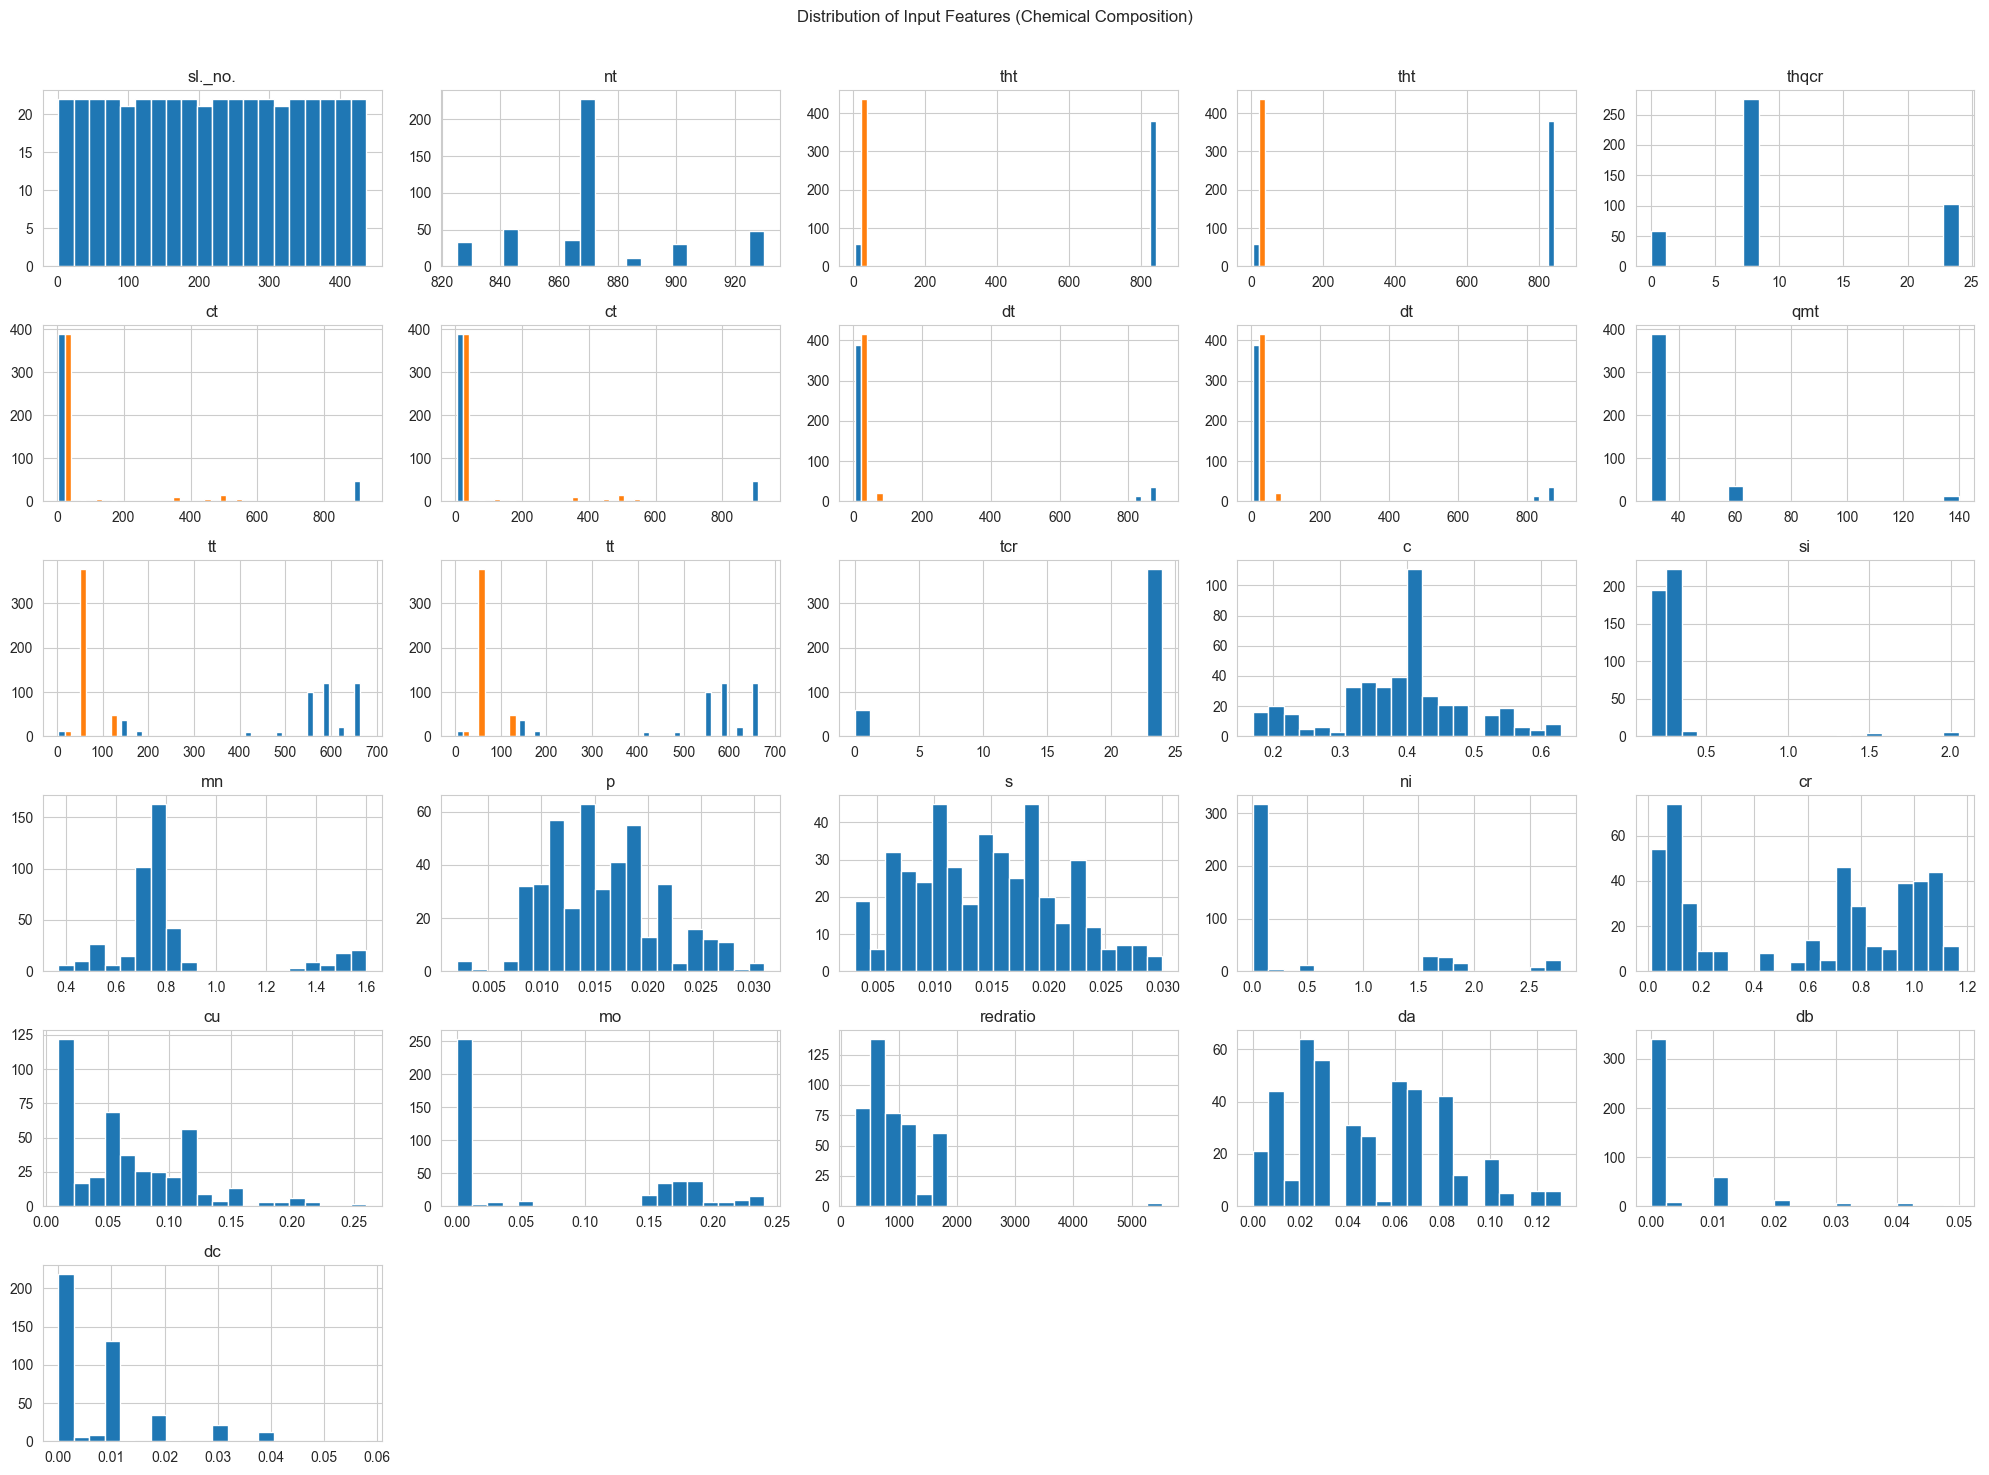

In [12]:
# Let's look at the distribution of all chemical components
features = df.drop(TARGET_COL, axis=1)
features.hist(bins=20, figsize=(20, 15))
plt.suptitle('Distribution of Input Features (Chemical Composition)')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

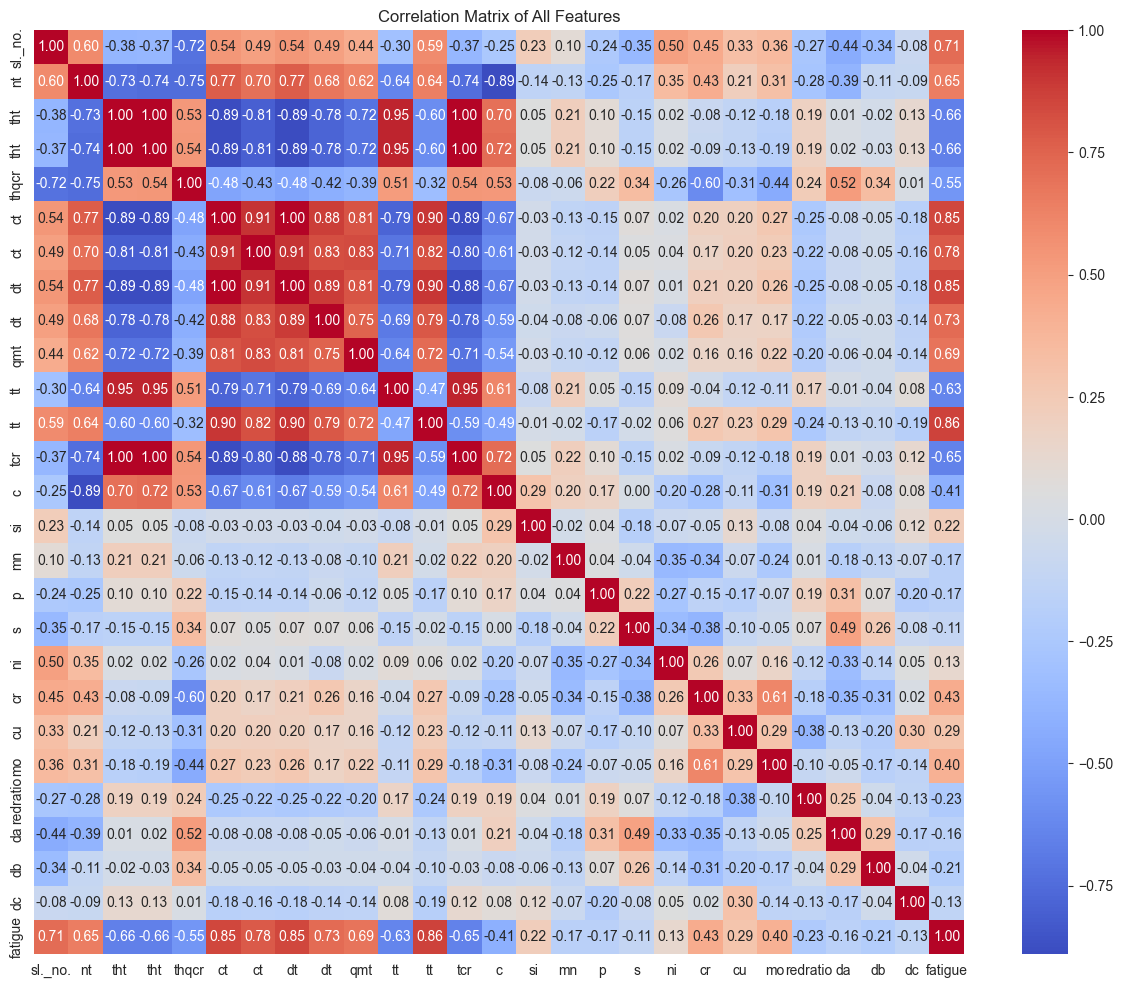

In [13]:
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()